<a href="https://colab.research.google.com/github/zooodung/TA-Prediction/blob/woogie/preprocess_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path='/content/drive/MyDrive/camp/project1/open/'

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [5]:
daegu_data=pd.read_csv('/content/drive/MyDrive/open/open/train.csv')
wide_data=pd.read_csv('/content/drive/MyDrive/open/open/external_open/countrywide_accident.csv')
test_data=pd.read_csv('/content/drive/MyDrive/open/open/test.csv')
daegu_data.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [6]:
columns_to_drop = ['ID', '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
                   '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']

daegu=daegu_data.drop(columns=columns_to_drop)



In [7]:
daegu[['시','군','구']] = daegu['시군구'].str.split(' ',expand=True)
daegu.drop(['시군구'],inplace=True, axis=1)

In [8]:
daegu[['도로형태1', '도로형태2']] = daegu['도로형태'].str.split(' - ', expand=True)
daegu.drop(['도로형태'],inplace=True, axis=1)

In [13]:
daegu.head()

,사고일시,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,시,군,구,도로형태1,도로형태2
0,2019-01-01 00,화요일,맑음,건조,차대사람,0,1,0,0,5,대구광역시,중구,대신동,단일로,기타
1,2019-01-01 00,화요일,흐림,건조,차대사람,0,0,1,0,3,대구광역시,달서구,감삼동,단일로,기타
2,2019-01-01 01,화요일,맑음,건조,차대사람,0,0,1,0,3,대구광역시,수성구,두산동,단일로,기타
3,2019-01-01 02,화요일,맑음,건조,차대차,0,1,0,0,5,대구광역시,북구,복현동,단일로,기타
4,2019-01-01 04,화요일,맑음,건조,차대차,0,0,1,0,3,대구광역시,동구,신암동,단일로,기타


In [14]:
wide=wide_data.copy()
len(wide)

602775

In [15]:
wide = wide[~wide['도로형태'].str.split().str[-1].str.contains('철길건널목')]
len(wide)

602763

In [16]:
wide=wide.drop(columns=columns_to_drop)

In [17]:
def contains_specific_location(address):
    cities = ['서울특별시', '인천광역시', '부산광역시', '울산광역시', '광주광역시', '대전광역시']
    for city in cities:
        if city in address:
            return True
    return False
wide=wide[wide['시군구'].apply(contains_specific_location)]

In [18]:
wide['시군구'].apply(lambda x:x.split()[0]).value_counts()

서울특별시    108395
부산광역시     36244
인천광역시     25115
광주광역시     23430
대전광역시     22579
울산광역시     11981
Name: 시군구, dtype: int64

In [19]:
wide[['시','군','구']] = wide['시군구'].str.split(' ',expand=True)
wide.drop(['시군구'],inplace=True, axis=1)

In [20]:
wide[['도로형태1', '도로형태2']] = wide['도로형태'].str.split(' - ', expand=True)
wide.drop(['도로형태'],inplace=True, axis=1)

In [21]:
wide.head()

,사고일시,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,시,군,구,도로형태1,도로형태2
0,2019-01-01 00,화요일,맑음,건조,차대사람,0,0,1,0,3,서울특별시,강서구,방화동,교차로,교차로횡단보도내
4,2019-01-01 00,화요일,맑음,건조,차대차,0,0,2,1,7,인천광역시,부평구,부평동,교차로,교차로안
5,2019-01-01 00,화요일,맑음,건조,차대사람,0,0,1,0,3,인천광역시,부평구,부평동,교차로,교차로부근
8,2019-01-01 00,화요일,맑음,건조,차대차,0,0,1,0,3,광주광역시,광산구,수완동,단일로,기타
11,2019-01-01 00,화요일,맑음,건조,차대사람,1,0,0,0,10,부산광역시,해운대구,우동,교차로,교차로안


데이터 합병

In [22]:
print(len(daegu),len(wide), len(daegu)+len(wide))

39609 227744 267353


In [23]:
concatenated_df = pd.concat([daegu, wide])
concatenated_df

,사고일시,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,시,군,구,도로형태1,도로형태2
0,2019-01-01 00,화요일,맑음,건조,차대사람,0,1,0,0,5,대구광역시,중구,대신동,단일로,기타
1,2019-01-01 00,화요일,흐림,건조,차대사람,0,0,1,0,3,대구광역시,달서구,감삼동,단일로,기타
2,2019-01-01 01,화요일,맑음,건조,차대사람,0,0,1,0,3,대구광역시,수성구,두산동,단일로,기타
3,2019-01-01 02,화요일,맑음,건조,차대차,0,1,0,0,5,대구광역시,북구,복현동,단일로,기타
4,2019-01-01 04,화요일,맑음,건조,차대차,0,0,1,0,3,대구광역시,동구,신암동,단일로,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602766,2021-12-31 23,금요일,맑음,건조,차대사람,0,0,1,0,3,서울특별시,서초구,반포동,단일로,기타
602769,2021-12-31 23,금요일,맑음,건조,차대차,0,1,0,0,5,부산광역시,연제구,연산동,단일로,기타
602770,2021-12-31 23,금요일,흐림,건조,차대차,0,1,1,0,8,부산광역시,해운대구,우동,교차로,교차로안
602771,2021-12-31 23,금요일,맑음,건조,차대차,0,0,2,0,6,서울특별시,성동구,행당동,단일로,기타


In [ ]:
!pip install pytimekr

In [ ]:
from pytimekr import pytimekr
for i in range(2019, 2024):
    kr_holidays = pytimekr.holidays(i)
    print(kr_holidays)

In [34]:
kr_holidays = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-05', '2019-05-12', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09', '2019-12-25',
                '2020-01-01' ,'2020-01-24' ,'2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25',
                '2021-01-01' ,'2021-02-11' ,'2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25',
                '2022-01-01' ,'2022-01-31' ,'2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2020-10-10', '2022-12-25',
                '2023-01-01' ,'2023-01-21' ,'2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01', '2023-05-05', '2023-05-26', '2023-06-06', '2023-08-15', '2023-09-28', '2023-09-29', '2023-09-30', '2023-10-03', '2023-10-09', '2023-12-25']

In [29]:
concatenated_df['사고일시'] = pd.to_datetime(concatenated_df['사고일시'])

# datetime에서 year, month, day, hour 추출하여 새로운 열 생성
concatenated_df['년도'] = concatenated_df['사고일시'].dt.year
concatenated_df['월'] = concatenated_df['사고일시'].dt.month
concatenated_df['day'] = concatenated_df['사고일시'].dt.day
concatenated_df['시간'] = concatenated_df['사고일시'].dt.hour
concatenated_df['day_of_week'] = concatenated_df['사고일시'].dt.dayofweek

In [30]:
concatenated_df['holiday'] = np.where((concatenated_df.day_of_week >= 5) | (concatenated_df.사고일시.dt.strftime('%Y-%m-%d').isin(kr_holidays)), '휴일', '평일')


In [31]:
concatenated_df.drop(columns=['사고일시'], inplace=True)

In [35]:
concatenated_df['holiday'].value_counts()

평일    195393
휴일     71960
Name: holiday, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55092 (\N{HANGUL SYLLABLE HYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


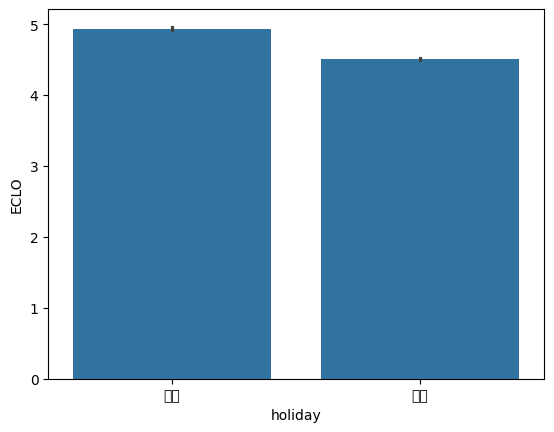

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 휴일에 따른 ECLO 사고 발생 비율 시각화
sns.barplot(data=concatenated_df, x='holiday', y='ECLO')
plt.show()

In [37]:
concatenated_df.drop(['day', 'day_of_week'], inplace=True, axis=1)

In [38]:
concatenated_df

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,시,군,구,도로형태1,도로형태2,년도,월,시간,holiday
0,화요일,맑음,건조,차대사람,0,1,0,0,5,대구광역시,중구,대신동,단일로,기타,2019,1,0,휴일
1,화요일,흐림,건조,차대사람,0,0,1,0,3,대구광역시,달서구,감삼동,단일로,기타,2019,1,0,휴일
2,화요일,맑음,건조,차대사람,0,0,1,0,3,대구광역시,수성구,두산동,단일로,기타,2019,1,1,휴일
3,화요일,맑음,건조,차대차,0,1,0,0,5,대구광역시,북구,복현동,단일로,기타,2019,1,2,휴일
4,화요일,맑음,건조,차대차,0,0,1,0,3,대구광역시,동구,신암동,단일로,기타,2019,1,4,휴일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602766,금요일,맑음,건조,차대사람,0,0,1,0,3,서울특별시,서초구,반포동,단일로,기타,2021,12,23,평일
602769,금요일,맑음,건조,차대차,0,1,0,0,5,부산광역시,연제구,연산동,단일로,기타,2021,12,23,평일
602770,금요일,흐림,건조,차대차,0,1,1,0,8,부산광역시,해운대구,우동,교차로,교차로안,2021,12,23,평일
602771,금요일,맑음,건조,차대차,0,0,2,0,6,서울특별시,성동구,행당동,단일로,기타,2021,12,23,평일


In [39]:
def seperate_time(time): #심야, 새벽, 아침, 점심, 오후, 저녁, 야간 ->4시간단위
    if 0<=int(time)<4:
        return '심야'
    elif int(time)<8:
        return '새벽'
    elif int(time)<12:
        return '점심'
    elif int(time)<16:
        return '오후'
    elif int(time)<20:
        return '저녁'
    else:
        return '야간'
concatenated_df['시간구분']=concatenated_df['시간'].apply(seperate_time)
print(concatenated_df['시간구분'].value_counts().sum())
concatenated_df['시간구분'].value_counts()

267353


저녁    71768
오후    58743
점심    50058
야간    47737
새벽    20554
심야    18493
Name: 시간구분, dtype: int64

In [40]:
def seperate_month(month):
    if int(month) in [12,1,2]:
        return '겨울'
    elif int(month) in [3,4,5]:
        return '봄'
    elif int(month) in [6,7,8]:
        return '여름'
    else:
        return '가을'
concatenated_df['계절']=concatenated_df['월'].apply(seperate_month)
print(concatenated_df['계절'].value_counts().sum())
concatenated_df['계절'].value_counts()

267353


가을    70234
여름    68434
봄     66607
겨울    62078
Name: 계절, dtype: int64

In [41]:
concatenated_df

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,시,군,구,도로형태1,도로형태2,년도,월,시간,holiday,시간구분,계절
0,화요일,맑음,건조,차대사람,0,1,0,0,5,대구광역시,중구,대신동,단일로,기타,2019,1,0,휴일,심야,겨울
1,화요일,흐림,건조,차대사람,0,0,1,0,3,대구광역시,달서구,감삼동,단일로,기타,2019,1,0,휴일,심야,겨울
2,화요일,맑음,건조,차대사람,0,0,1,0,3,대구광역시,수성구,두산동,단일로,기타,2019,1,1,휴일,심야,겨울
3,화요일,맑음,건조,차대차,0,1,0,0,5,대구광역시,북구,복현동,단일로,기타,2019,1,2,휴일,심야,겨울
4,화요일,맑음,건조,차대차,0,0,1,0,3,대구광역시,동구,신암동,단일로,기타,2019,1,4,휴일,새벽,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602766,금요일,맑음,건조,차대사람,0,0,1,0,3,서울특별시,서초구,반포동,단일로,기타,2021,12,23,평일,야간,겨울
602769,금요일,맑음,건조,차대차,0,1,0,0,5,부산광역시,연제구,연산동,단일로,기타,2021,12,23,평일,야간,겨울
602770,금요일,흐림,건조,차대차,0,1,1,0,8,부산광역시,해운대구,우동,교차로,교차로안,2021,12,23,평일,야간,겨울
602771,금요일,맑음,건조,차대차,0,0,2,0,6,서울특별시,성동구,행당동,단일로,기타,2021,12,23,평일,야간,겨울


In [44]:
city_columns = concatenated_df.columns[1:]
city_encoded = pd.get_dummies(concatenated_df, columns = city_columns)
city_encoded = city_encoded.iloc[:, 1:].astype(float)
display(city_encoded.head())

,기상상태_기타,기상상태_눈,기상상태_맑음,기상상태_비,기상상태_안개,기상상태_흐림,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,...,시간구분_새벽,시간구분_심야,시간구분_야간,시간구분_오후,시간구분_저녁,시간구분_점심,계절_가을,계절_겨울,계절_봄,계절_여름
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#test data


In [ ]:
test=test_data.copy()

In [ ]:
test[['년도','월','일+시간']] = test['사고일시'].str.split('-',expand=True)
test[['일','시간']]= test['일+시간'].str.split(' ',expand=True)
test.drop(['일+시간','사고일시'],inplace=True, axis=1)

In [ ]:
test[['시','군','구']] = test['시군구'].str.split(' ',expand=True)
test.drop(['시군구'],inplace=True, axis=1)

In [ ]:
test[['도로형태1', '도로형태2']] = test['도로형태'].str.split(' - ', expand=True)
test.drop(['도로형태'],inplace=True, axis=1)

In [ ]:
test['주말여부']=test['요일'].apply(lambda x:'주말' if x in ['토요일','일요일'] else '평일')
# test.head()
test['주말여부'].value_counts()

평일    8157
주말    2806
Name: 주말여부, dtype: int64

In [ ]:
test['시간구분']=test['시간'].apply(seperate_time)
print(test['시간구분'].value_counts().sum())
test['시간구분'].value_counts()

10963


저녁    3168
오후    2548
점심    2196
야간    1765
새벽     708
심야     578
Name: 시간구분, dtype: int64

In [ ]:
test['계절']=test['월'].apply(seperate_month)
print(test['계절'].value_counts().sum())
test['계절'].value_counts()

10963


가울    2947
여름    2783
봄     2771
겨울    2462
Name: 계절, dtype: int64

In [ ]:
test.drop('ID',axis=1,inplace=True)
test.drop('일',axis=1,inplace=True)

In [ ]:
test

,요일,기상상태,노면상태,사고유형,년도,월,시간,시,군,구,도로형태1,도로형태2,주말여부,시간구분,계절
0,토요일,맑음,건조,차대사람,2022,01,01,대구광역시,수성구,상동,교차로,교차로안,주말,심야,겨울
1,토요일,맑음,건조,차대사람,2022,01,01,대구광역시,수성구,지산동,단일로,기타,주말,심야,겨울
2,토요일,맑음,건조,차대차,2022,01,04,대구광역시,수성구,수성동2가,교차로,교차로안,주말,새벽,겨울
3,토요일,맑음,건조,차대차,2022,01,04,대구광역시,수성구,신매동,단일로,기타,주말,새벽,겨울
4,토요일,맑음,건조,차대차,2022,01,06,대구광역시,달서구,감삼동,교차로,교차로안,주말,새벽,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,토요일,맑음,건조,차대차,2022,12,18,대구광역시,남구,대명동,단일로,터널,주말,저녁,겨울
10959,토요일,맑음,건조,차대차,2022,12,18,대구광역시,수성구,시지동,단일로,기타,주말,저녁,겨울
10960,토요일,맑음,건조,차대차,2022,12,20,대구광역시,수성구,연호동,단일로,기타,주말,야간,겨울
10961,토요일,맑음,건조,차대차,2022,12,20,대구광역시,수성구,범물동,교차로,교차로부근,주말,야간,겨울


In [ ]:
concatenated_df

,요일,기상상태,노면상태,사고유형,사망자수,중상자수,경상자수,부상자수,ECLO,년도,월,시간,시,군,구,도로형태1,도로형태2,주말여부,시간구분,계절
0,화요일,맑음,건조,차대사람,0,1,0,0,5,2019,01,00,대구광역시,중구,대신동,단일로,기타,평일,심야,겨울
1,화요일,흐림,건조,차대사람,0,0,1,0,3,2019,01,00,대구광역시,달서구,감삼동,단일로,기타,평일,심야,겨울
2,화요일,맑음,건조,차대사람,0,0,1,0,3,2019,01,01,대구광역시,수성구,두산동,단일로,기타,평일,심야,겨울
3,화요일,맑음,건조,차대차,0,1,0,0,5,2019,01,02,대구광역시,북구,복현동,단일로,기타,평일,심야,겨울
4,화요일,맑음,건조,차대차,0,0,1,0,3,2019,01,04,대구광역시,동구,신암동,단일로,기타,평일,새벽,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602766,금요일,맑음,건조,차대사람,0,0,1,0,3,2021,12,23,서울특별시,서초구,반포동,단일로,기타,평일,야간,겨울
602769,금요일,맑음,건조,차대차,0,1,0,0,5,2021,12,23,부산광역시,연제구,연산동,단일로,기타,평일,야간,겨울
602770,금요일,흐림,건조,차대차,0,1,1,0,8,2021,12,23,부산광역시,해운대구,우동,교차로,교차로안,평일,야간,겨울
602771,금요일,맑음,건조,차대차,0,0,2,0,6,2021,12,23,서울특별시,성동구,행당동,단일로,기타,평일,야간,겨울
